## Lead Scoring Case Study
With 37 predictor variables we need to predict whether a potental lead will purchase (potential paid customers) products of X education comapny. 

### Importing necessary libraries and reading the dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing 'lead' dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the data

In [4]:
#shape 
lead_data.shape

(9240, 37)

In [5]:
# we have 9000+ datapoints which we can be considered a good chunk of data for any model building , if necessary.

In [6]:
# Checking high level info 
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking statistical attibutes for numerical features
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### This is a classification problem where we have to classify each customer in primarily two categories , whether they have bought courses from X education or not and then predict how likely new customers can be categorized into one of them

### Understanding different features 

In [8]:
Cat_features = lead_data.select_dtypes(include=['object']).columns
Cat_features

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
for cols in Cat_features:
    print(cols, lead_data[cols].unique())

Prospect ID ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email ['No' 'Yes']
Do Not Call ['No' 'Yes']
Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Vi

In [10]:
Con_features = lead_data.select_dtypes(exclude = ['object']).columns
Con_features

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [11]:
for cols in Con_features:
    print(cols, lead_data[cols].unique())

Lead Number [660737 660728 660727 ... 579545 579538 579533]
Converted [0 1]
TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website [   0  674 1532 ...  603  483  927]
Page Views Per Visit [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45

In [12]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
## It seems all the features are having correc datatypes assigned. 
## We now see a lot of mising values for different features, lets tackle them first.

### Data Cleaning : Missing Value Treatment

In [14]:
#total Missing values for different features
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
#total Missing values for different features interms of percentage of total data of that feature
missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),2).sort_values(ascending = False) 


In [16]:
#feature having missing values
missing[missing > 0.1 ]

Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Asymmetrique Activity Index                      0.46
Tags                                             0.36
What is your current occupation                  0.29
Lead Profile                                     0.29
What matters most to you in choosing a course    0.29
Country                                          0.27
How did you hear about X Education               0.24
Specialization                                   0.16
City                                             0.15
dtype: float64

####  Understanding 'Lead Quality'

In [17]:
# lets understand one by one
lead_data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [18]:
lead_data.groupby('Lead Quality')['Converted'].sum()

Lead Quality
High in Relevance     603
Low in Relevance      477
Might be             1179
Not Sure              266
Worst                  12
Name: Converted, dtype: int64

In [19]:
# for this feature, it depends on perception of particular individual assigned to each customer, it is evident from above as well
#  lots of 'Might be' / 'Not Sure' have ultimately been converted, even some of the seemingly 'worst' customers have been converted.
# So we can drop this feature considering it introduces a lot of contradictions in model development and also it has a lot of missing values.

####  Understanding 'Asymmetrique Activity Score'  and  'Asymmetrique Profile Score'

In [20]:
# lets understand one by one
lead_data['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [21]:
lead_data.groupby('Asymmetrique Activity Score')['Converted'].sum()

Asymmetrique Activity Score
7.0       0
8.0       0
9.0       0
10.0      3
11.0      7
12.0     23
13.0     98
14.0    710
15.0    822
16.0    228
17.0     17
18.0      0
Name: Converted, dtype: int64

In [22]:
lead_data['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [23]:
lead_data.groupby('Asymmetrique Profile Score')['Converted'].sum()

Asymmetrique Profile Score
11.0      5
12.0     10
13.0     48
14.0     57
15.0    500
16.0    243
17.0    262
18.0    383
19.0    182
20.0    218
Name: Converted, dtype: int64

In [24]:
# We understand that Activity score has been generated by considering features such as 'TotalVisits' , 'Total Time Spent on Website' ,
# 'Page Views Per Visit' , 'Last Notable Activity' etc. and similarly, Profle score has ben generated by considering 
# 'Specialization' , 'What is your current occupation' , 'Lead Profile' , 'What matters most to you in choosing a course' etc.

In [25]:
# But, there are few records where although no information is available on customer activity/profile , still the score assigned is pretty high.
# so it seems there are few other attributes which contributes to these scores, which are unknown to us. Its dangerous to impute such missing values
# We cannot remove the missing values either as the size is quite significant, so we will drop such features from the dataset.
# we will assume, the contribution of profile / activity score will be compensated by other relevant features from the available dataset.

In [26]:
# Dropping Lead Quality & Asymmetrique Score and Indices and checking the missing values status : 
lead_data = lead_data.drop(['Lead Quality','Asymmetrique Activity Index' ,'Asymmetrique Profile Index', 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score'],  axis = 1)

In [27]:
missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),2).sort_values(ascending = False)
missing[missing > 0]

Tags                                             0.36
Lead Profile                                     0.29
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
How did you hear about X Education               0.24
Specialization                                   0.16
City                                             0.15
Last Activity                                    0.01
TotalVisits                                      0.01
Page Views Per Visit                             0.01
dtype: float64

#### Understanding  'Tags' , 'What matters most to you in choosing a course' , 'What is your current occupation' , 'Lead Profile'

In [28]:
# Next, 'Tags' 
lead_data['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [29]:
lead_data.groupby('Tags')['Converted'].sum()

Tags
Already a student                                       3
Busy                                                  105
Closed by Horizzon                                    356
Diploma holder (Not Eligible)                           1
Graduation in progress                                  7
In confusion whether part time or DLP                   1
Interested  in full time MBA                            3
Interested in Next batch                                5
Interested in other courses                            13
Lateral student                                         3
Lost to EINS                                          171
Lost to Others                                          0
Not doing further education                             1
Recognition issue (DEC approval)                        0
Ringing                                                34
Shall take in the next coming month                     1
Still Thinking                                          1
Universit

In [30]:
# It seems we can imupte most frequent observation for null values in 'Tags' feature

In [31]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [32]:
lead_data.groupby('What matters most to you in choosing a course')['Converted'].sum()

What matters most to you in choosing a course
Better Career Prospects      3190
Flexibility & Convenience       1
Other                           0
Name: Converted, dtype: int64

In [33]:
# It seems we can impute the most frequent category for this feature also.

In [34]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [35]:
lead_data.groupby('What is your current occupation')['Converted'].sum()

What is your current occupation
Businessman                5
Housewife                 10
Other                     10
Student                   78
Unemployed              2441
Working Professional     647
Name: Converted, dtype: int64

In [36]:
# here its difficult to impute, as we know this might be an important feature. Although the data is already skewed towards 'Unemployed Section', so we will impute with 'Unemployed'

In [37]:
lead_data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [38]:
lead_data.groupby('Lead Profile')['Converted'].sum()

Lead Profile
Dual Specialization Student      20
Lateral Student                  23
Other Leads                     180
Potential Lead                 1267
Select                         1692
Student of SomeSchool             9
Name: Converted, dtype: int64

In [39]:
# A lot of records have 'Select' as a profile. As this is an input from company's end, it might be safe to drop this feature.
# The occupation related feature can make up for this information loss, we assume.

In [40]:
# So, lets drop 'Lead Profile' feature and remove records with missing values from 'What is your current occupation' feature.

In [41]:
lead_data = lead_data.drop('Lead Profile' , axis = 1)
missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),2).sort_values(ascending = False)
missing[missing > 0]

Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
How did you hear about X Education               0.24
Specialization                                   0.16
City                                             0.15
Last Activity                                    0.01
Page Views Per Visit                             0.01
TotalVisits                                      0.01
dtype: float64

In [42]:
lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [43]:
lead_data.groupby('Specialization')['Converted'].sum()

Specialization
Banking, Investment And Insurance    167
Business Administration              179
E-Business                            21
E-COMMERCE                            40
Finance Management                   436
Healthcare Management                 79
Hospitality Management                48
Human Resource Management            388
IT Projects Management               140
International Business                64
Marketing Management                 408
Media and Advertising                 85
Operations Management                238
Retail Management                     34
Rural and Agribusiness                31
Select                               818
Services Excellence                   11
Supply Chain Management              151
Travel and Tourism                    72
Name: Converted, dtype: int64

In [44]:
lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [45]:
lead_data.groupby('How did you hear about X Education')['Converted'].sum()

How did you hear about X Education
Advertisements             32
Email                      13
Multiple Sources           56
Online Search             343
Other                      75
SMS                         5
Select                   2431
Social Media               28
Student of SomeSchool     143
Word Of Mouth             152
Name: Converted, dtype: int64

In [46]:
# for Specialization feature we see a lot of 'Select' which basically means this field has not been chosen by some of the candidates.
# So, instead of dropping them lets put those and  null values records under 'Others' category.
# Similarly, for 'How did you hear about X Education', we can follow same strategy. 

In [47]:
# replacing 'Select' with 'others'
lead_data['Specialization'] = lead_data['Specialization'].replace('Select', 'Others')
lead_data['How did you hear about X Education'] = lead_data['How did you hear about X Education'].replace('Select', 'Others')

In [48]:
lead_data.shape

(9240, 31)

In [49]:
# for the remaining we will impute for 'country' , 'Lead Source' , 'Last Activity' with most frequent observation.
# for 'TotalVisits' and 'Page Views Per Visit' we will impute with median.

#### imputing with median

In [50]:
A_median = np.nanmedian(lead_data['TotalVisits'])
B_median = np.nanmedian(lead_data['Page Views Per Visit'])

In [51]:
lead_data['TotalVisits'].fillna(A_median, inplace=True)
lead_data['Page Views Per Visit'].fillna(B_median, inplace=True)

In [52]:
# Checking missing value status
# Some of the missing values were hidden beacause of the round function was earlier set to 2 decimal places, lets set it to be 5.
missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),5).sort_values(ascending = False)
missing[missing > 0]

Tags                                             0.36288
What matters most to you in choosing a course    0.29318
What is your current occupation                  0.29113
Country                                          0.26634
How did you hear about X Education               0.23885
Specialization                                   0.15563
City                                             0.15368
Last Activity                                    0.01115
Lead Source                                      0.00390
dtype: float64

#### imputing with mode

In [53]:
for var in ['Tags', 'What matters most to you in choosing a course','What is your current occupation', 'Country' ,'City' ,'How did you hear about X Education', 'Specialization','Last Activity' , 'Lead Source']:
    print(lead_data[var].value_counts())

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [54]:
# So the modes are 
# 'Tags' : 'Will revert after reading the email'
# 'What matters most to you in choosing a course' : 'Better Career Prospects'
# 'What is your current occupation' : 'Unemployed'
# 'Country' : 'India' 
# 'City' : 'Mumbai'
# 'Last Activity' : 'Email Opened'
# 'Lead Source' : 'Google'

In [55]:
lead_data['Tags'].fillna('Will revert after reading the email', inplace=True)

In [56]:
lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [57]:
lead_data['What is your current occupation'].fillna('Unemployed', inplace=True)

In [58]:
lead_data['Country'].fillna('India', inplace=True)

In [59]:
lead_data['City'].fillna('Mumbai', inplace=True)

In [60]:
lead_data['Last Activity'].fillna('Email Opened', inplace=True)

In [61]:
lead_data['Lead Source'].fillna('Google', inplace=True)

In [62]:
# Checking missing value status

missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),5).sort_values(ascending = False)
missing

How did you hear about X Education               0.23885
Specialization                                   0.15563
Prospect ID                                      0.00000
Magazine                                         0.00000
A free copy of Mastering The Interview           0.00000
I agree to pay the amount through cheque         0.00000
City                                             0.00000
Get updates on DM Content                        0.00000
Update me on Supply Chain Content                0.00000
Tags                                             0.00000
Receive More Updates About Our Courses           0.00000
Through Recommendations                          0.00000
Digital Advertisement                            0.00000
Newspaper                                        0.00000
X Education Forums                               0.00000
Newspaper Article                                0.00000
What matters most to you in choosing a course    0.00000
Search                         

In [63]:
# as understood earlier, there are some missing values in 'How did you hear about X Education' & 'Specialization'.
# which we will replace with 'Others' as well.

In [64]:
lead_data['How did you hear about X Education'].fillna('Others', inplace=True)

In [65]:
lead_data['Specialization'].fillna('Others', inplace=True)

In [66]:
# checking missing value status again 
missing  = round((lead_data.isnull().sum() / lead_data.shape[0]),5).sort_values(ascending = False)
missing

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
How did you hear about X Education            

In [67]:
# So, we have successfully remoced all missing values present in the dataset. 
# Also, we have done some feature selection exercise along the way which will help later on.

### Data Cleaning : Outliers Inspection

In [68]:
# Selected features
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [69]:
lead_data.describe(percentiles = [0.1, 0.2, 0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ,0.95 ,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
20%,592772.800000,0.000000,0.000000,0.000000,0.000000
30%,600313.400000,0.000000,2.000000,57.000000,1.000000
40%,607412.200000,0.000000,2.000000,146.000000,2.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
60%,624689.200000,0.000000,3.000000,372.000000,2.500000


In [70]:
# It seems there are some outliers present in the data, lets visualise them
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

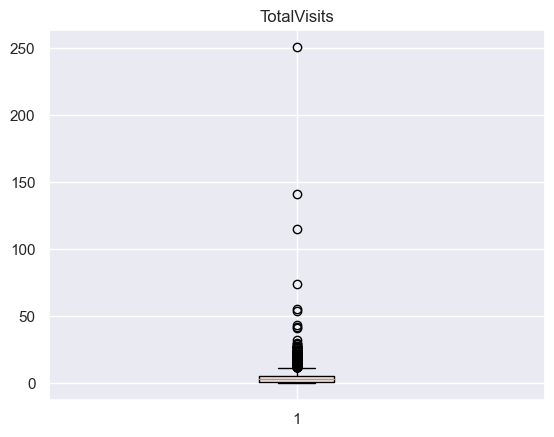

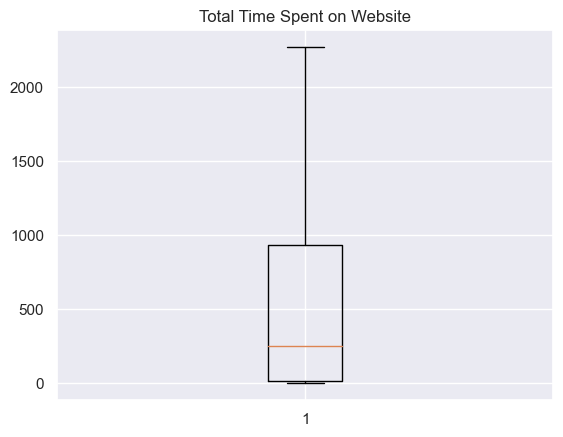

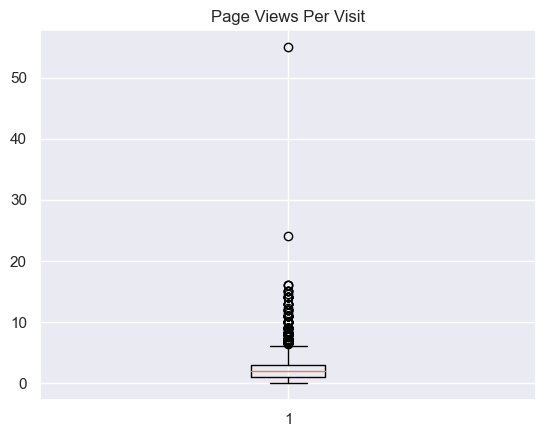

In [71]:
for i in ['TotalVisits' , 'Total Time Spent on Website', 'Page Views Per Visit']:
    plt.boxplot(lead_data[i])
    plt.title(i)
    plt.show()

In [72]:
# It seems 'TotalVisits' and 'Page Views Per Visit' have some outliers

In [73]:
lead_data[lead_data['Page Views Per Visit'] > 8].shape

(123, 31)

In [74]:
lead_data[lead_data['TotalVisits'] > 17].shape

(83, 31)

In [75]:
# lets understand relationships of these features better with our TARGET variable which is 'converted' feature.
# we will try using correlation coefficient among these features and TARGET feature.
corr = lead_data[['TotalVisits' , 'Page Views Per Visit' ,'Total Time Spent on Website', 'Converted']]
corr.corr()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website,Converted
TotalVisits,1.000000,0.512214,0.217341,0.029119
Page Views Per Visit,0.512214,1.000000,0.314266,-0.005068
Total Time Spent on Website,0.217341,0.314266,1.000000,0.362483
Converted,0.029119,-0.005068,0.362483,1.000000


In [76]:
# it seems, none of these two features have strong correlation with Target feature, but some good relation among themselves.
# lets drop any one of them, so we will drop 'TotalVisits'
# Dropping 'TotalVisits'
lead_data = lead_data.drop('TotalVisits' , axis = 1)

In [77]:
lead_data.shape

(9240, 30)

### Exploratory Data Analysis

### Univariate Analysis

In [78]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [79]:
# lets start with our target feature which is 'Converted' feature. Lets see what percent of records are converted.
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

In [80]:
# almost 39% of the records are converted, which means we have a balanced dataset.

In [81]:
# to begin with the the rest, 'Lead Number' is basically random number generated for the records, so we can safely drop it.
# but before dropping lets check if there are any duplicate records. 

#checking duplicates
sum(lead_data.duplicated(subset = 'Prospect ID')) == 0

True

In [82]:
# this basically means there are no duplicate values in the dataset. now, lets drop 'Lead Number' feature.

In [83]:
lead_data = lead_data.drop( 'Lead Number' , axis = 1)

In [84]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Lead Origin

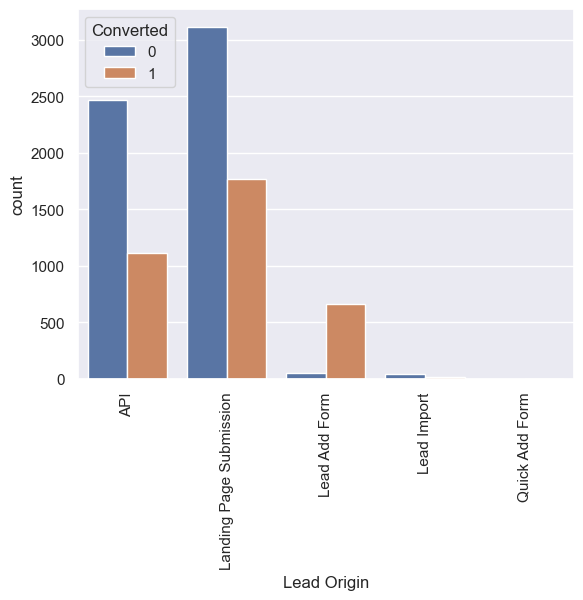

In [85]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [86]:
# Its clear that most of the converts are coming thru API and Landing Page Submissions.
# The conversion rate is comparatively higher for Lead add form category.
# So, the comapny should ensure to increase efficacy by assisting leads filling up the form in cae of queries.
# such that the conversion rate increases. 

#### Lead Source

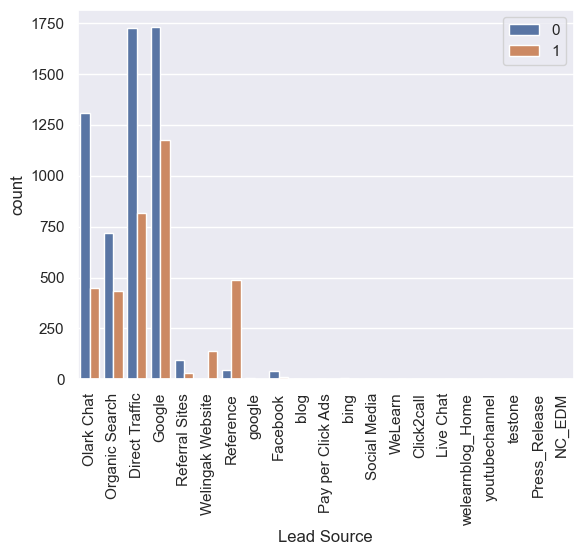

In [87]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

In [88]:
# here we see, the entries are repeated for 'Google' due to upper and lower case variation.
# also a lot of the channels are not contributing much individually, so lets put them in one bucket.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

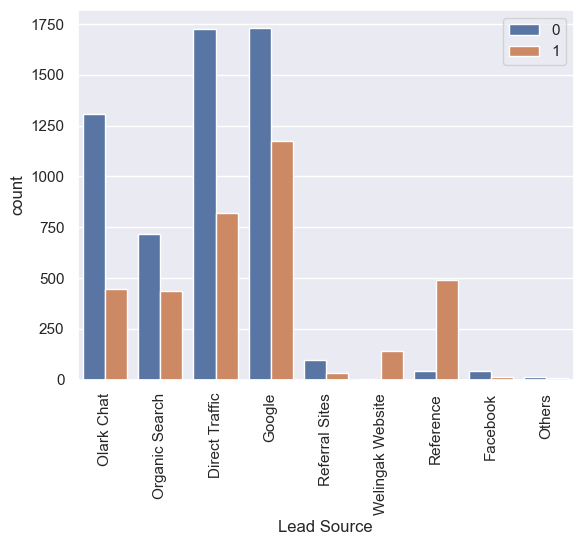

In [89]:
# plotting again with updated buckets
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

In [90]:
# lead conversion rate thru Reference and Welingak Website are pretty high, so marketing for these channels should be increased.
# Leads are also getting generated from Google/direct traffic as well, company should look into increasing conversion rate by managing the the channels properly.
# Olark chart has lesser conversion rate. Facebook and others are not contributing much, so resource and effort can be shifted to more promising channels.

#### Do Not Email and Do Not Call

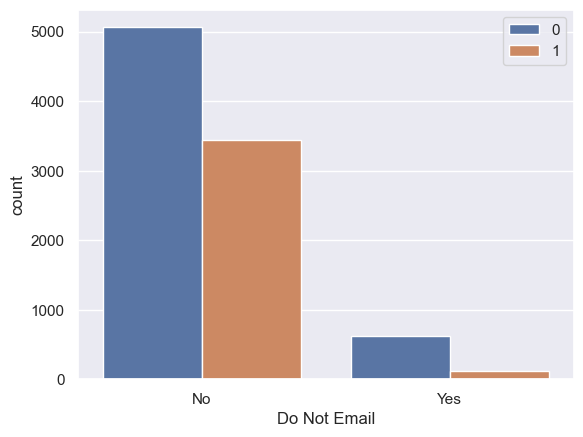

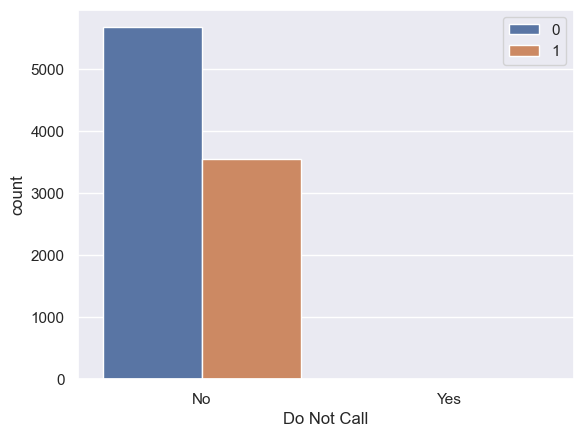

In [91]:
for var in ['Do Not Email', 'Do Not Call']:
    sns.countplot(x = var , hue = "Converted", data = lead_data)
    plt.legend(loc='upper right')
    plt.show()

In [92]:
# its evident that most leads dont prefer to be called or emailed. Company should look into why it is like that... are the staffs are not putting enough attention to the customer queries?

#### Total Time Spent on Website & Page Views Per Visit

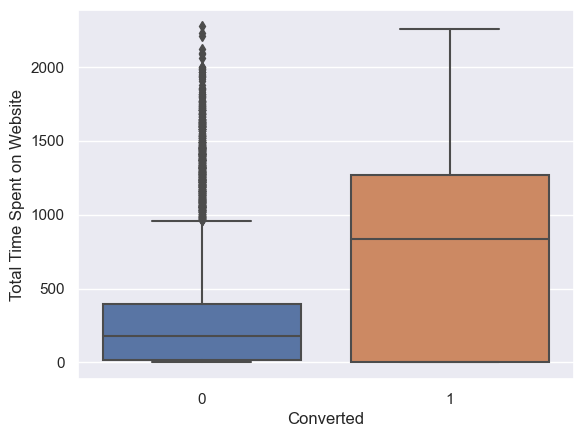

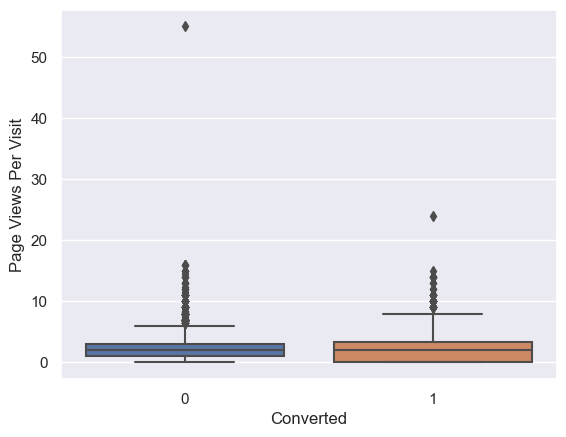

In [93]:
for var in ['Total Time Spent on Website' ,'Page Views Per Visit']:
    sns.boxplot(y = var, x = 'Converted', data = lead_data)
    plt.show()

In [94]:
# company should look into the fact despite spending a lot of time in the website, a lot of customers are not buying any course, 
# so focus should be on increasing customer experience on the website along with quick assistance thru live chats or having clear description of the courses in the website.

In [95]:
# inspecting 'Page Views Per Visit' : 
lead_data['Page Views Per Visit'].describe(percentiles = [0.1, 0.25, 0.5 , 0.75,0.85,0.9,0.95, 0.99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
85%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [96]:
# lets inspect the records where page views are more than 10:
lead_data[lead_data['Page Views Per Visit'] > 10].groupby('Page Views Per Visit')['Converted'].sum()

Page Views Per Visit
11.00    7
11.50    0
12.00    2
12.33    0
13.00    2
14.00    6
14.50    0
15.00    1
16.00    0
24.00    1
55.00    0
Name: Converted, dtype: int64

In [97]:
# these records should not be dropped as almost 40% of them are converted. So we will not treat them as outliers.

#### Country and City

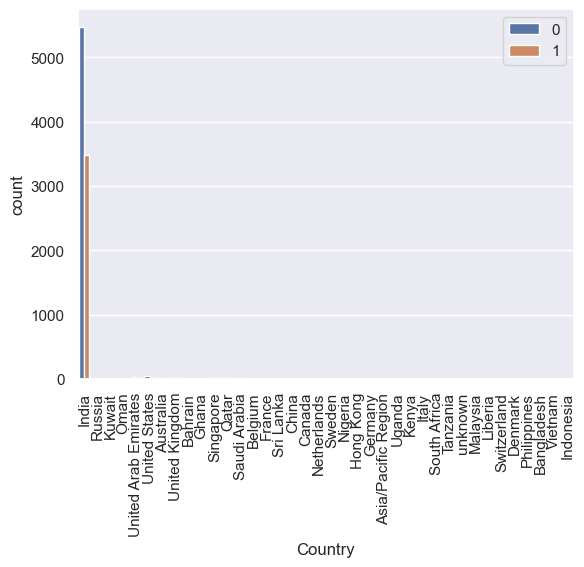

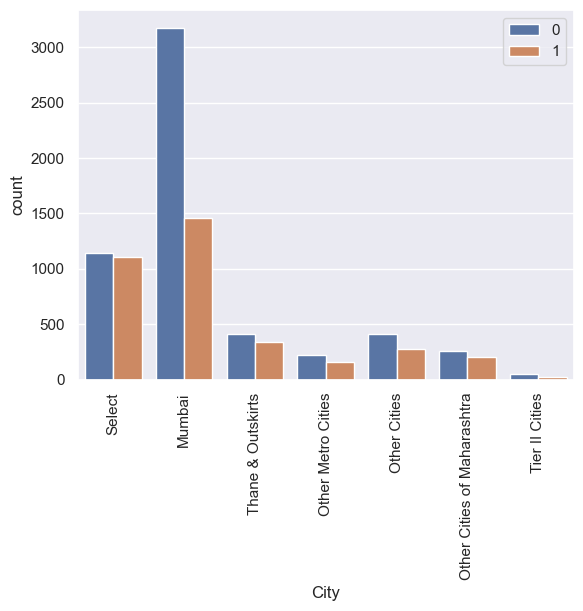

In [98]:
for var in ['Country', 'City']:
    sns.countplot(x = var , hue = "Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.legend(loc='upper right')
    plt.show()

In [99]:
# as the plot of country is not very clear, lets take a look by grouping the countries.
lead_data.groupby('Country')['Converted'].sum()

Country
Asia/Pacific Region        1
Australia                  3
Bahrain                    4
Bangladesh                 1
Belgium                    0
Canada                     0
China                      0
Denmark                    1
France                     3
Germany                    1
Ghana                      0
Hong Kong                  4
India                   3477
Indonesia                  0
Italy                      0
Kenya                      0
Kuwait                     0
Liberia                    0
Malaysia                   0
Netherlands                1
Nigeria                    0
Oman                       3
Philippines                0
Qatar                      1
Russia                     0
Saudi Arabia               4
Singapore                 11
South Africa               1
Sri Lanka                  0
Sweden                     1
Switzerland                0
Tanzania                   0
Uganda                     0
United Arab Emirates      20
United

In [100]:
# Its very evident, that most of the customers of X education are from india and the other countries are not even comparable. So lets drop this feature
lead_data = lead_data.drop('Country' , axis = 1)

In [101]:
# for city , lets put 'Select' s with 'Other Cities'
lead_data['City'] = lead_data['City'].replace('Select','Other Cities')

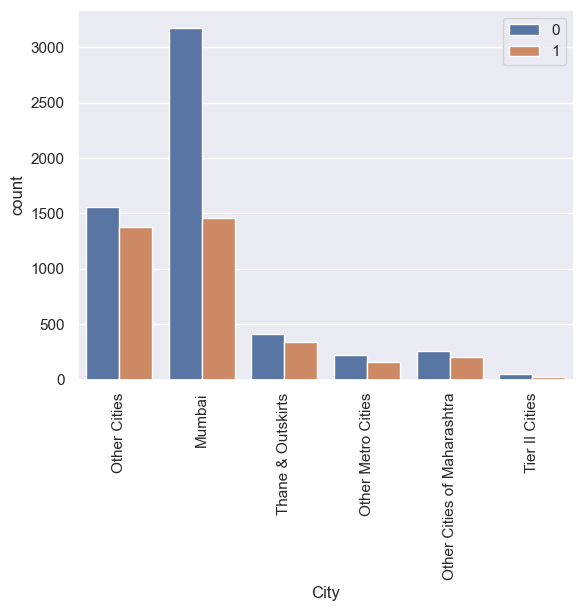

In [102]:
sns.countplot(x = 'City' , hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

#### Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course

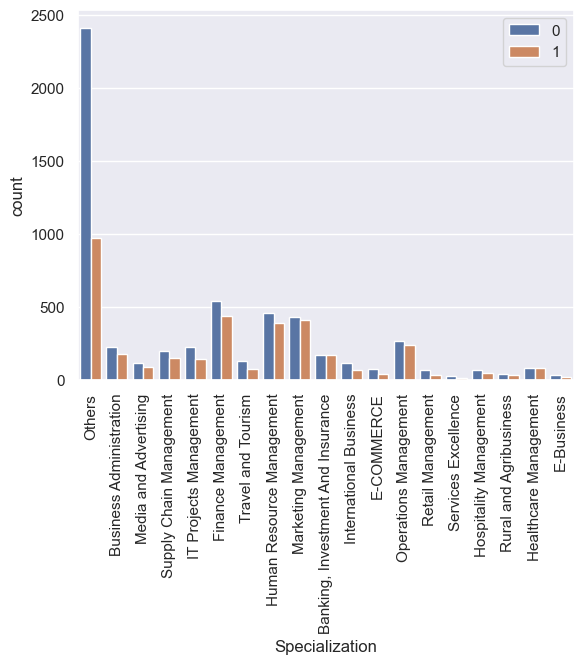

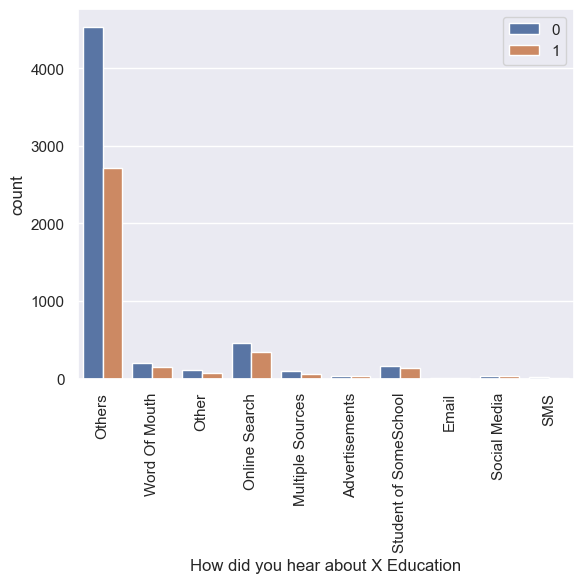

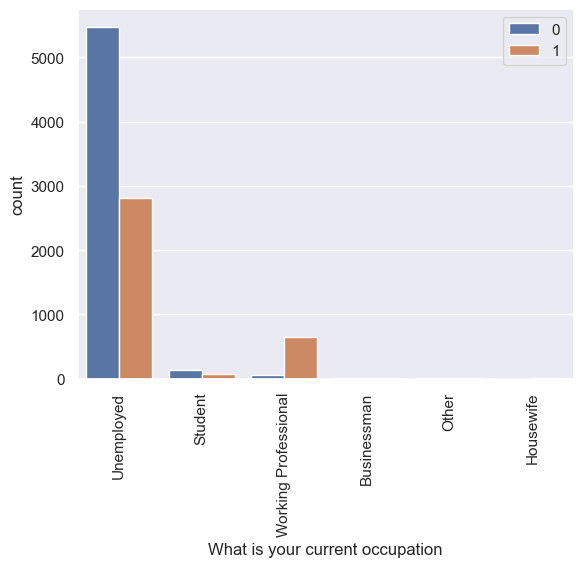

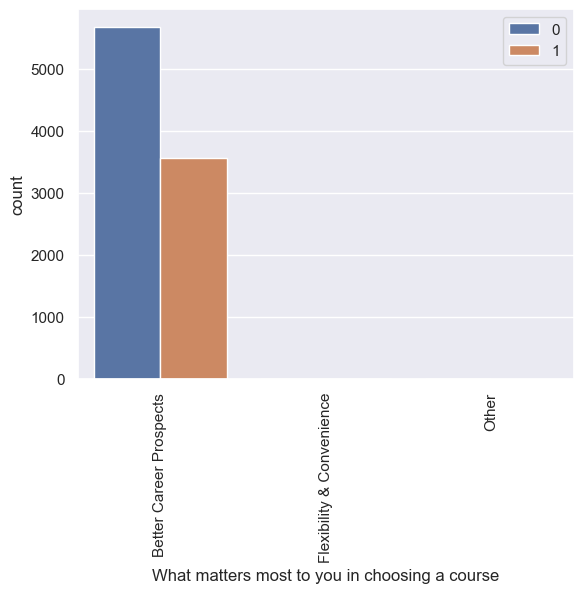

In [103]:
for var in ['Specialization', 'How did you hear about X Education','What is your current occupation' , 'What matters most to you in choosing a course']:
    sns.countplot(x = var , hue = "Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.legend(loc='upper right')
    plt.show()

In [104]:
# here, we see, people with specialisation in Finance, HR, Banking, OM are having good conversion rates, so company should target these groups.
# for 'How did you hear about X Education' no definite inference can be taken, data is heavily biased towards Others category, which anyway does not add value, so we will drop this feature.
# For current occupation, unemployed is by far the most lead generating section. Working professionals having very high conversion rate.We can put remaining in others category
# 'What matters most to you in choosing a course' this feature does not add value and heavily biased, so we will drop this as well.

In [105]:
lead_data = lead_data.drop(['How did you hear about X Education', 'What matters most to you in choosing a course'] , axis = 1)

In [106]:
# for What is your current occupation , lets put 'Housewife'&'Businessman' with 'other'
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

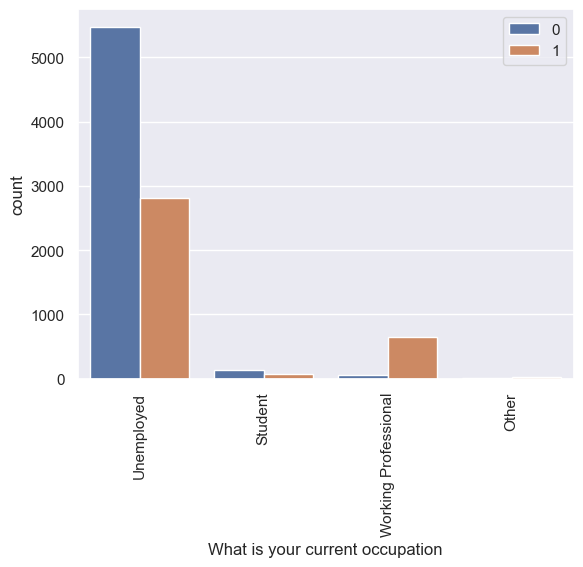

In [107]:
# plotting 'What is your current occupation'
sns.countplot(x = 'What is your current occupation' , hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

#### The remaining features

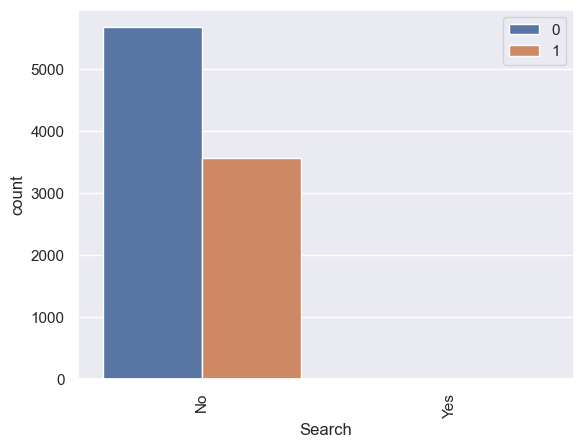

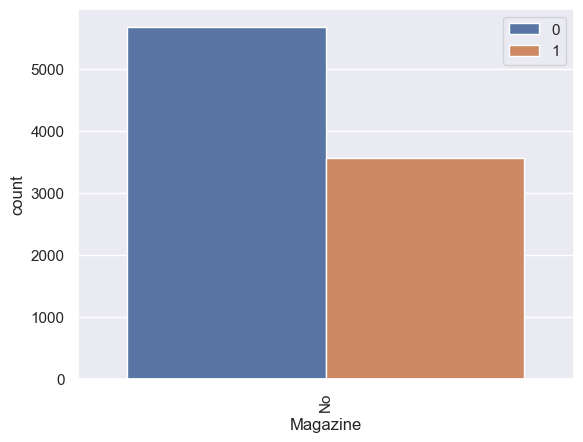

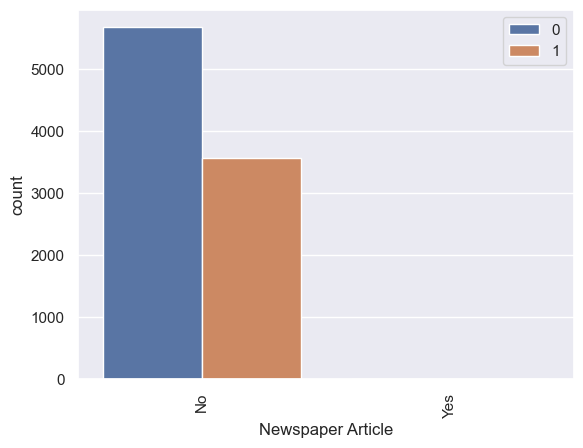

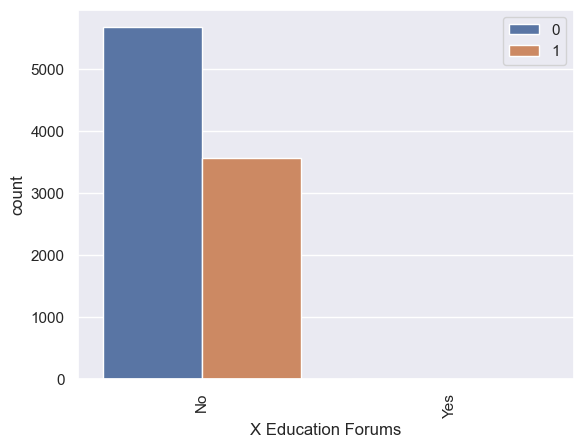

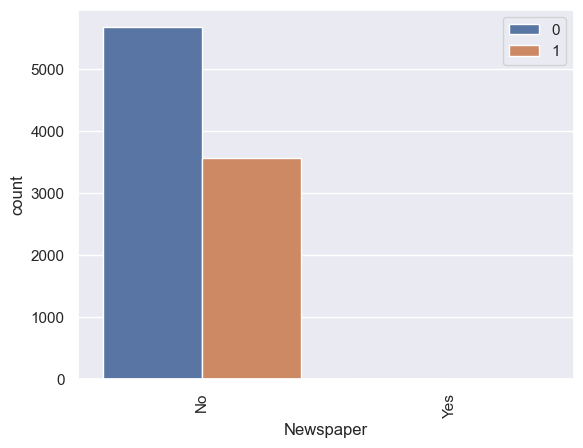

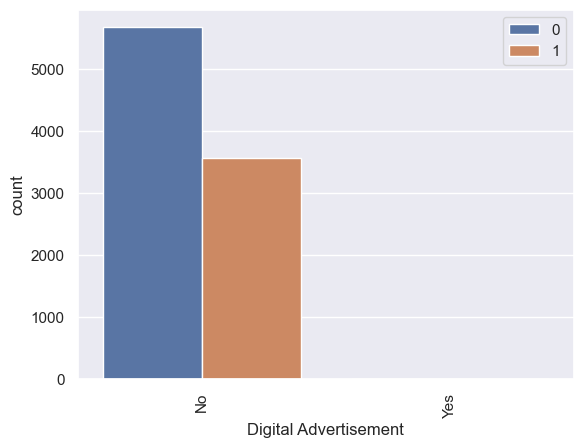

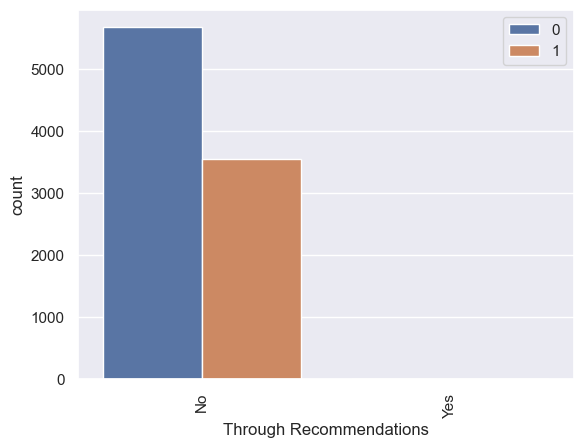

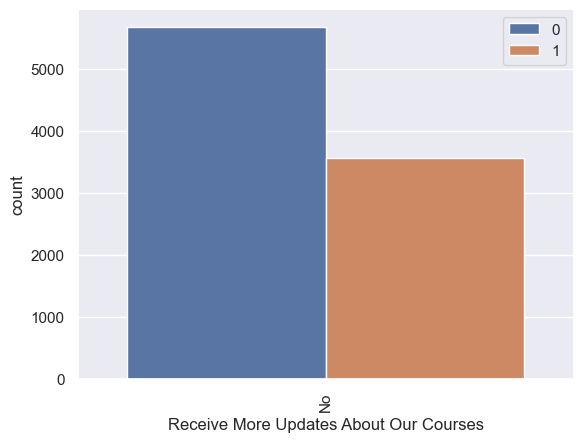

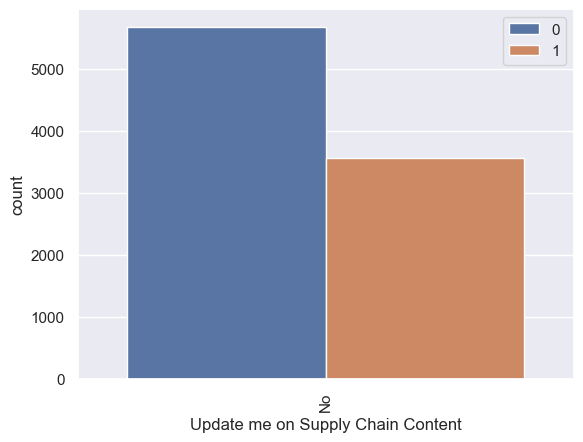

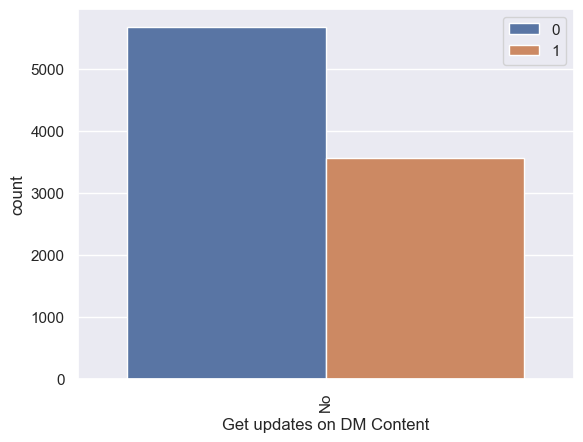

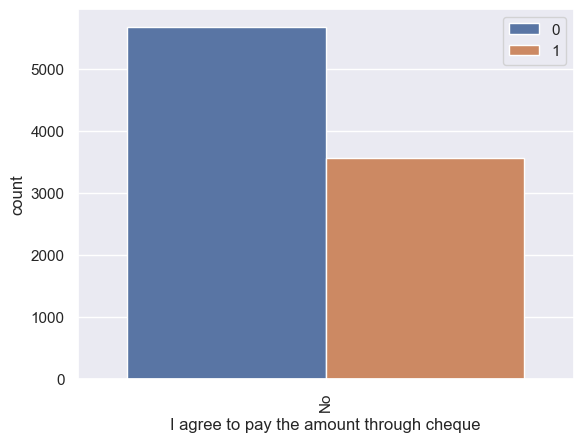

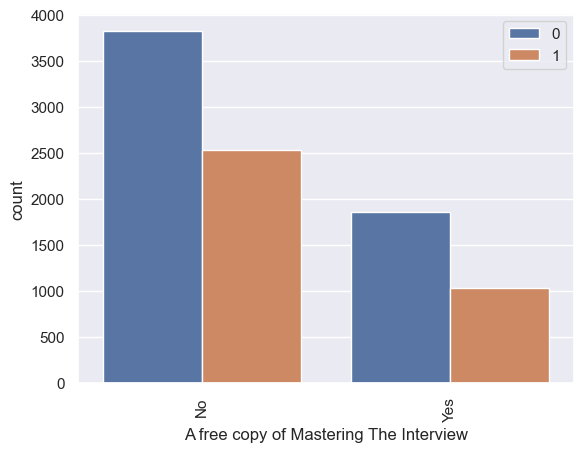

In [108]:
for var in ['Search', 'Magazine',  'Newspaper Article' ,'X Education Forums' ,'Newspaper' , 'Digital Advertisement'  , 'Through Recommendations'  ,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    sns.countplot(x = var , hue = "Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.legend(loc='upper right')
    plt.show()

In [109]:
# 'Search','Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' can be dropped.
lead_data = lead_data.drop(['Search','Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'] , axis = 1)

#### Last Activity & Last Notable Activity

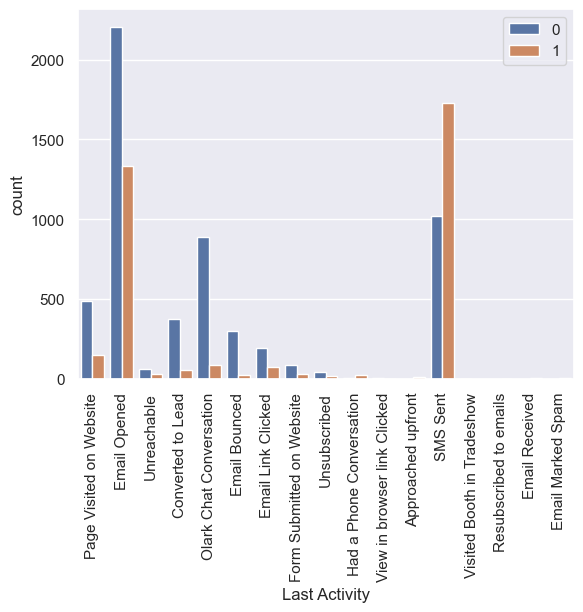

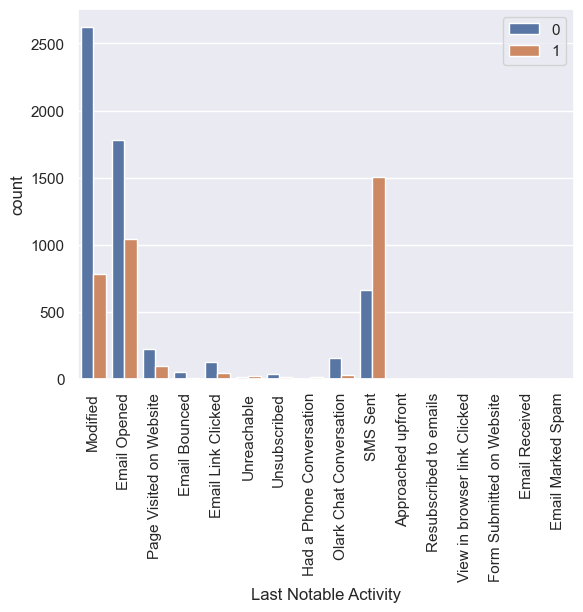

In [110]:
# plotting these variables
for var in ['Last Activity', 'Last Notable Activity']:
    sns.countplot(x = var , hue = "Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.legend(loc='upper right')
    plt.show()

In [111]:
# We will drop 'Last Activity' feature, as these two are basically same.
lead_data = lead_data.drop('Last Activity' , axis =1)

In [112]:
# for 'Last Notable Activity' lets check value_counts
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [113]:
# lets keep the subcategories with leasser counts under 'others' category
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Email Bounced' ,'Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other_activity')

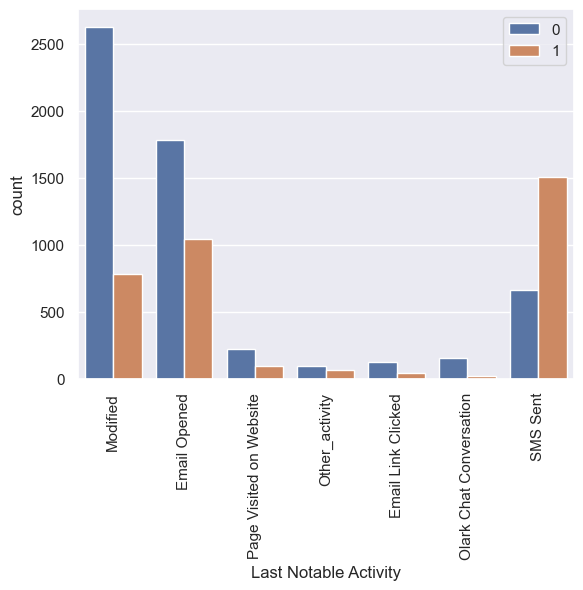

In [114]:
# plotting for understanding frequencies of different subcategories
sns.countplot(x = 'Last Notable Activity' , hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

#### Tags

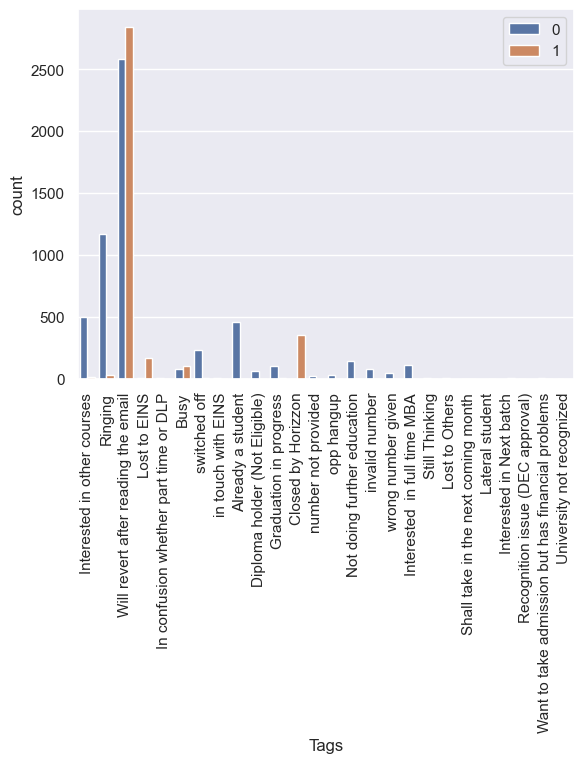

In [115]:
sns.countplot(x = 'Tags' , hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

In [116]:
lead_data['Tags'].value_counts()

Tags
Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [117]:
# lets put the categories having less than 30 in 'Other_Tags'
lead_data['Tags'] = lead_data['Tags'].replace(['number not provided' ,'in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other_Tags')

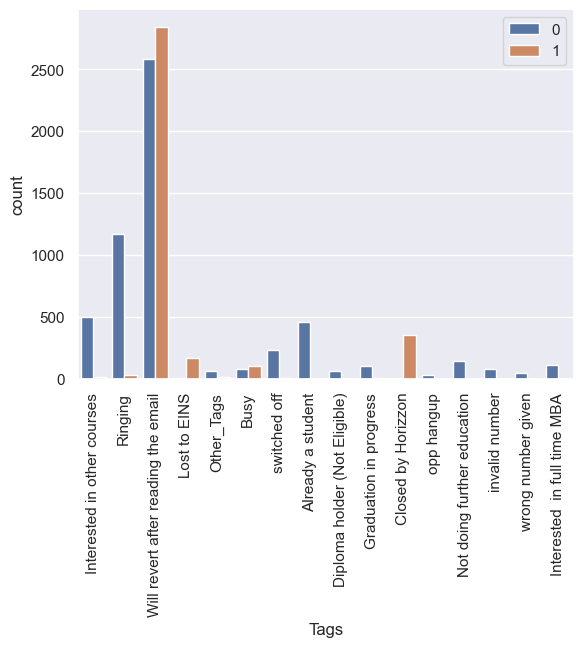

In [118]:
sns.countplot(x = 'Tags' , hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

In [119]:
# some of the subcategories within 'Tags' category are ambigous (such as 'Lost to EINS' , 'Ringing' , 'Closed by Horizzon' etc)
# these subcategories, even thouch can be significant, add no value and are not interpretable. So we will drop 'Tags' feature.

In [120]:
lead_data = lead_data.drop('Tags' , axis = 1)

In [121]:
lead_data.shape

(9240, 13)

In [122]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

### Data Preparation

#### Converting binary variables to numerical features : to 0/1 values

In [123]:
# sorting binary features
binary = ['Do Not Email' , 'Do Not Call' , 'A free copy of Mastering The Interview']
# mapping function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# applying the function

lead_data[binary] = lead_data[binary].apply(binary_map)

#### Converting the multi-categorical features into numerical features using one hot encoding

In [124]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse = False)

In [125]:
Cat_features = lead_data.select_dtypes(include=['object']).columns
Cat_features = Cat_features.drop('Prospect ID')

In [126]:
ohe_df = pd.DataFrame(ohe.fit_transform(lead_data[Cat_features]))
ohe_df.columns = ohe.get_feature_names(Cat_features)

In [127]:
ohe_df.shape

(9240, 44)

In [128]:
lead_data.shape

(9240, 13)

In [129]:
# merging ohe_df with lead_data
lead_data_mod = pd.concat([lead_data , ohe_df] , axis = 1)
lead_data_mod.shape

(9240, 57)

In [130]:
# dropping categorical features for which one hot encoding has been done
lead_data_mod = lead_data_mod.drop(Cat_features , axis = 1)

In [131]:
lead_data_mod.shape

(9240, 51)

In [132]:
lead_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Do Not Email                                          9240 non-null   int64  
 2   Do Not Call                                           9240 non-null   int64  
 3   Converted                                             9240 non-null   int64  
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   float64
 8   Lead Origin_Lead Add Form                             9240

####  Test-Train Split

In [133]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data_mod.drop(['Converted' ,'Prospect ID'], axis=1)


# Putting response variable to y
y = lead_data_mod['Converted']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# applying on X_train
X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,0,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6795,0,0,0.214349,0.024182,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3516,0,0,0.046655,0.045455,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8105,0,0,0.541373,0.090909,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3934,0,0,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [135]:
# applying on X_test
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4269,0,0,0.444982,0.145455,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2376,0,0,0.000000,0.000000,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7766,0,0,0.025968,0.090909,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9199,0,0,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4359,0,0,0.000000,0.000000,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Looking at Correlations : Bivariate Analysis

In [136]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

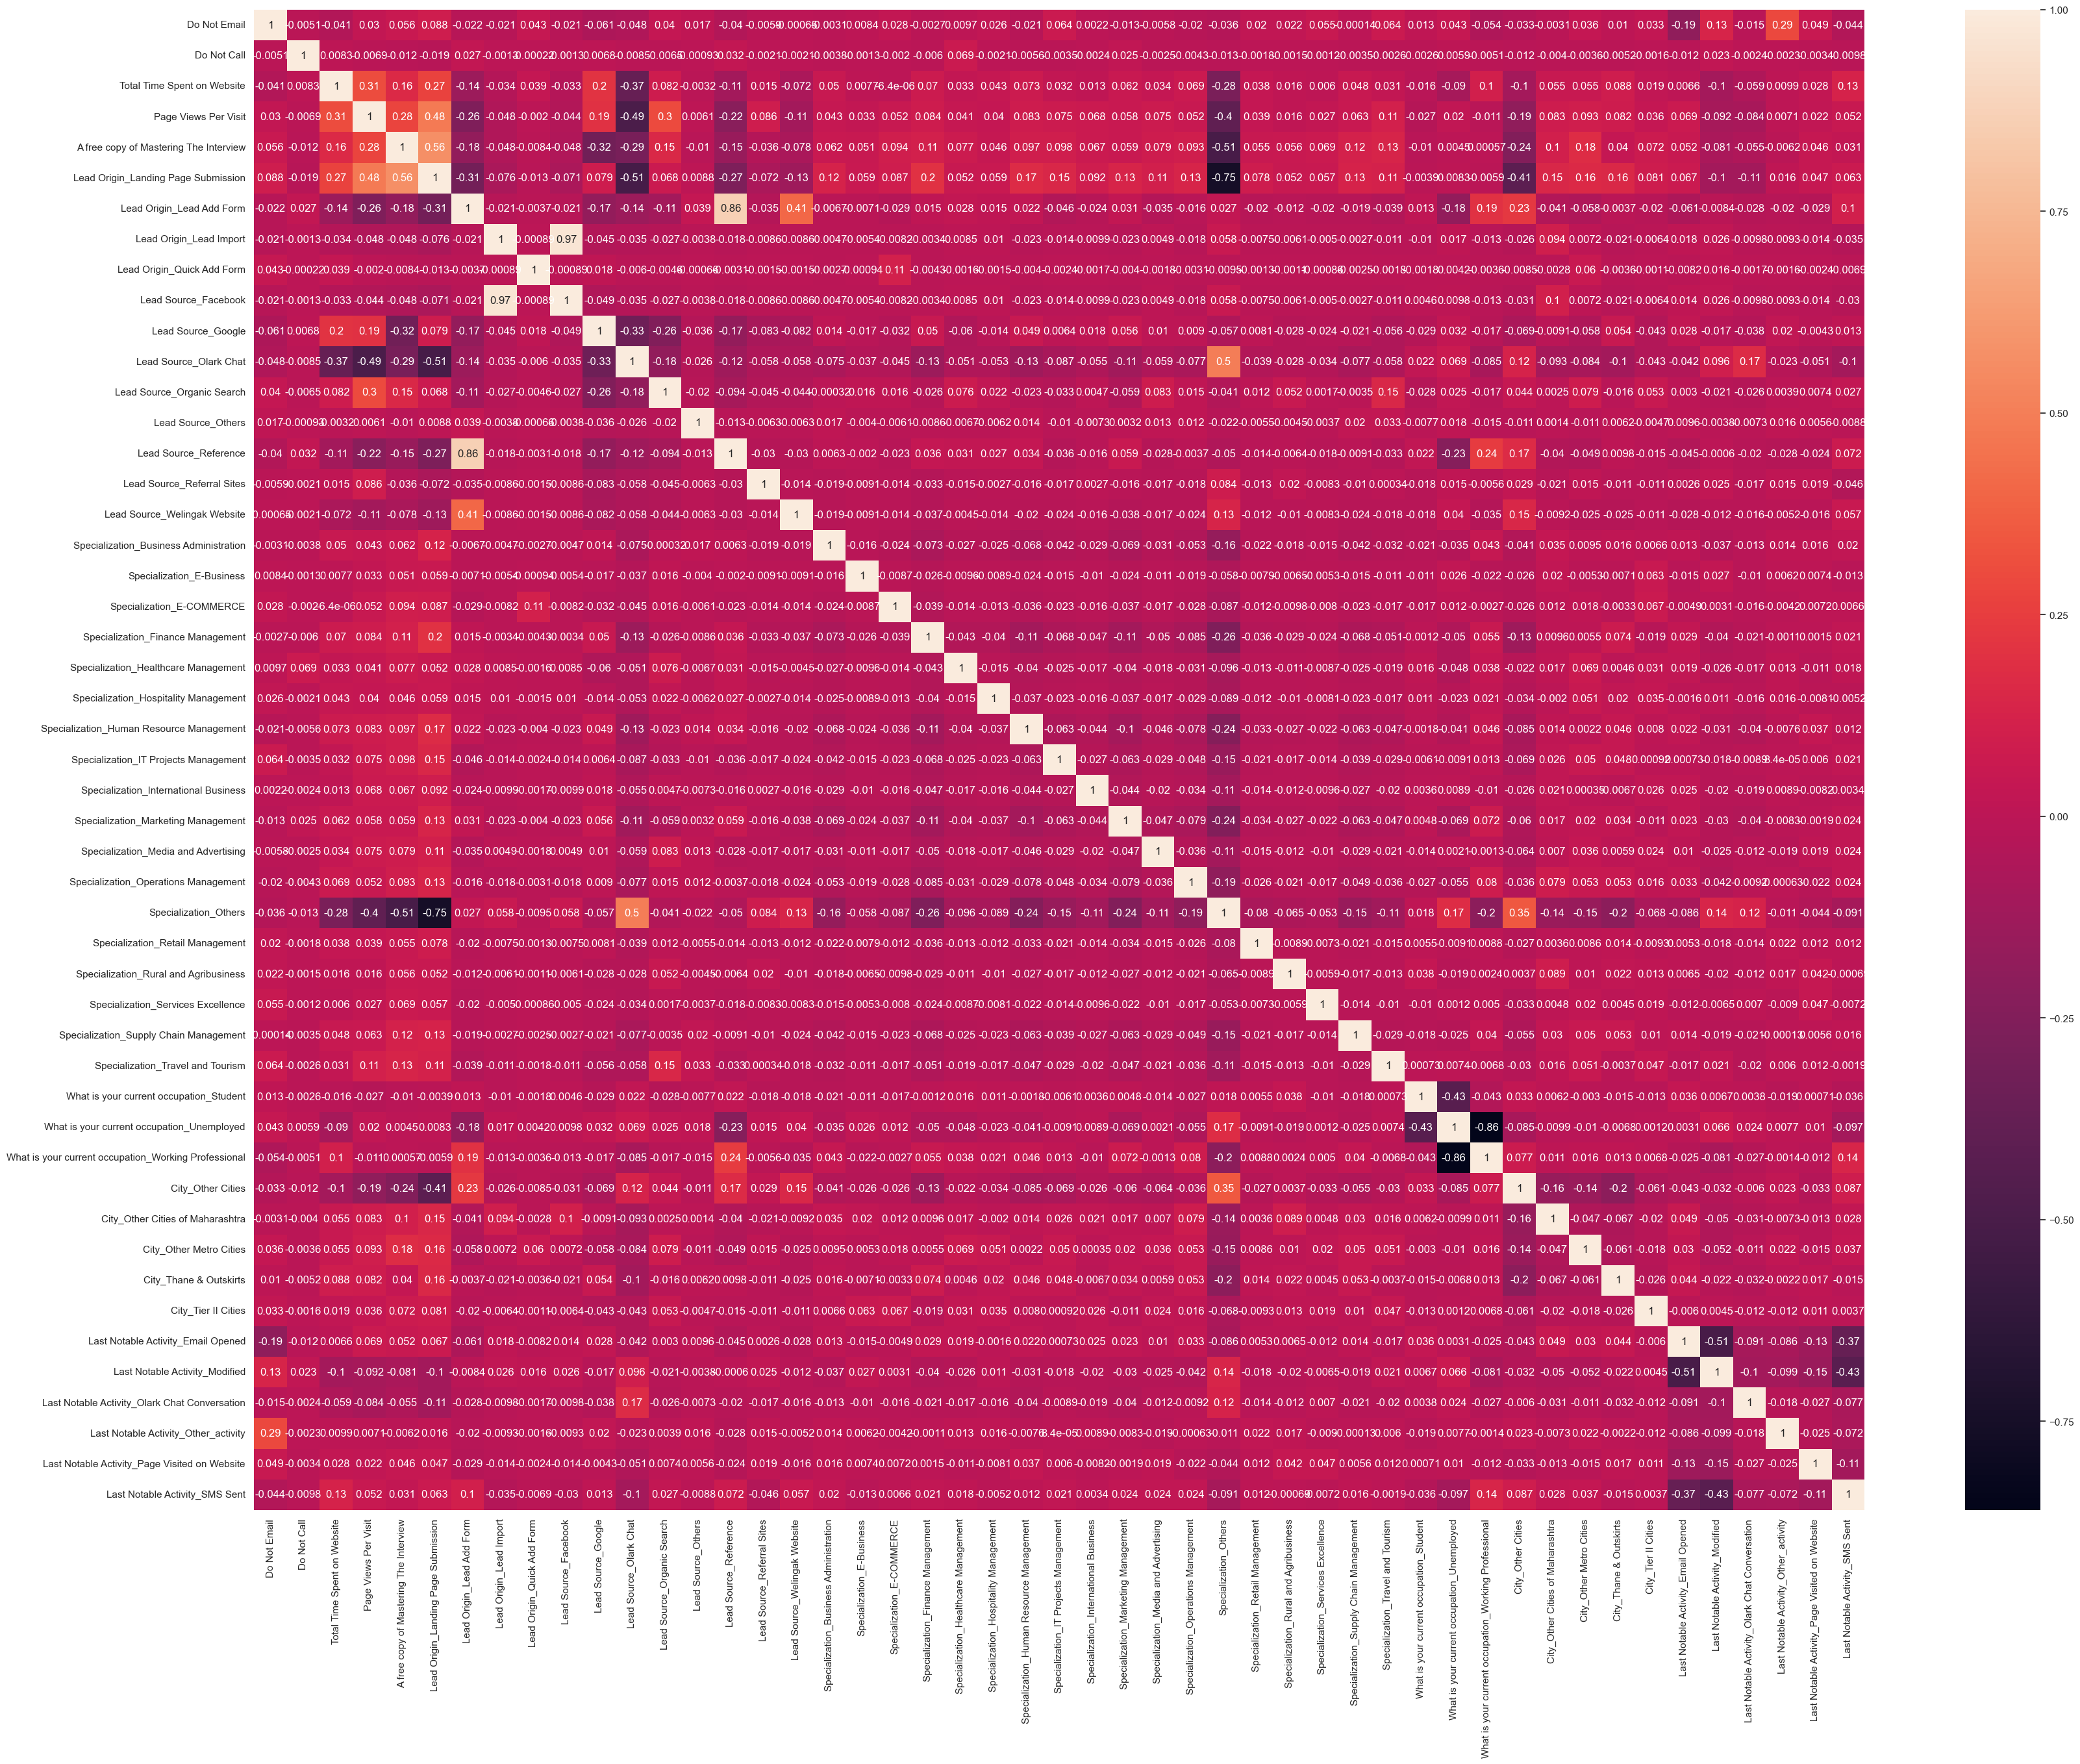

In [137]:
# Let's see the heatmap
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [138]:
# it's difficult to infer from heatmap, we will tackle the multicollinearity issue while buidling model using VIF

### Model Building
#### Running 1st Training Model

In [139]:
import statsmodels.api as sm

In [140]:
# We will start with Logistic regression model as a classifier

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Wed, 16 Aug 2023   Deviance:                       5285.7
Time:                        23:12:54   Pearson chi2:                 7.25e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7334      0.655     -1.120      0.263      -2.017       0.550
Do Not Email                                            -1.4873      0.190     -7.838      0.000      -1.859      -1.115
Do Not Call                                             20.3814   2.05e+04      0.001      0.999   -4.01e+04    4.02e+04
Total Time Spent on Website                              4.5055      0.167     27.043      0.000       4.179       4.832
Page Views Per Visit                                    -1.3992      1.256     -1.114      0.265      -3.861       1.063
A free copy of Mastering The Interview                  -0.1701      0.108     -1.575      0.115      -0.382       0.042
Lead Origin_Landing Page Submission                     -0.8244      0.138     -5.952      0.000      -1.096      -0.553
Lead Origin_Lead Add Form                                2.8180      0.506      5.573      0.000       1.827       3.809
Lead Origin_Lead Import                                  0.5824      1.819      0.320      0.749      -2.984       4.148
Lead Origin_Quick Add Form                              20.0105   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Facebook                                    -0.3107      1.821     -0.171      0.865      -3.880       3.258
Lead Source_Google                                       0.3116      0.115      2.715      0.007       0.087       0.537
Lead Source_Olark Chat                                   1.1052      0.160      6.892      0.000       0.791       1.419
Lead Source_Organic Search                               0.1669      0.131      1.274      0.203      -0.090       0.424
Lead Source_Others                                       0.3903      0.641      0.609      0.542      -0.866       1.646
Lead Source_Reference                                    0.6732      0.548      1.228      0.220      -0.402       1.748
Lead Source_Referral Sites                               0.0877      0.323      0.272      0.786      -0.545       0.720
Lead Source_Welingak Website                             3.0950      0.884      3.503      0.000       1.363       4.827
Specialization_Business Administration                  -0.3106      0.244     -1.275      0.202      -0.788       0.167
Specialization_E-Business                               -0.1628      0.519     -0.313      0.754      -1.181       0.855
Specialization_E-COMMERCE                                0.0943      0.347      0.272      0.786      -0.586       0.774
Specialization_Finance Management                       -0.0416      0.208     -0.200      0.842      -0.450       0.367
Specialization_Healthcare Management                    -0

In [141]:
# here a lot of variables are statistically insignificant
# so lets start with 20 features using RFE

#### Feature Selection Using RFE

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [143]:
rfe.support_

array([ True, False,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True])

In [144]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 25),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Healthcare Management', False, 27),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_H

In [145]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
 

##### Assessing the model with StatsModels

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.5
Date:                Wed, 16 Aug 2023   Deviance:                       5341.0
Time:                        23:13:00   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1342      0.552     -0.243      0.808      -1.216       0.947
Do Not Email                                            -1.4968      0.186     -8.066      0.000      -1.861      -1.133
Total Time Spent on Website                              4.5066      0.165     27.354      0.000       4.184       4.830
Page Views Per Visit                                    -0.9453      1.187     -0.796      0.426      -3.272       1.381
Lead Origin_Landing Page Submission                     -1.0888      0.128     -8.538      0.000      -1.339      -0.839
Lead Origin_Lead Add Form                                3.0200      0.501      6.032      0.000       2.039       4.001
Lead Source_Olark Chat                                   0.8380      0.129      6.515      0.000       0.586       1.090
Lead Source_Reference                                    0.2771      0.532      0.521      0.602      -0.765       1.319
Lead Source_Welingak Website                             2.8001      0.875      3.199      0.001       1.084       4.516
Specialization_Hospitality Management                   -1.1129      0.334     -3.329      0.001      -1.768      -0.458
Specialization_International Business                   -0.4713      0.255     -1.848      0.065      -0.971       0.028
Specialization_Others                                   -1.2051      0.123     -9.777      0.000      -1.447      -0.964
Specialization_Retail Management                        -0.5255      0.337     -1.561      0.118      -1.185       0.134
Specialization_Rural and Agribusiness                    0.5136      0.397      1.295      0.195      -0.264       1.291
What is your current occupation_Student                 -0.5976      0.587     -1.019      0.308      -1.747       0.552
What is your current occupation_Unemployed              -0.9603      0.536     -1.792      0.073      -2.011       0.090
What is your current occupation_Working Professional     1.6388      0.566      2.895      0.004       0.529       2.748
Last Notable Activity_Modified                          -0.6483      0.085     -7.641      0.000      -0.815      -0.482
Last Notable Activity_Olark Chat Conversation           -1.1452      0.339     -3.380      0.001      -1.809      -0.481
Last Notable Activity_Other_activity                     1.2855      0.280      4.597      0.000       0.737       1.834
Last Notable Activity_SMS Sent                           1.4437      0.086     16.722      0.000       1.275       1.613
========================================================================================================================
"""

In [147]:
# it seems some of the features are statistically insignificant.
# lets remove 'What is your current occupation_Student' from the dataset

In [148]:
col_1 = col.drop('What is your current occupation_Student', 1)

#### Running 2nd model

In [149]:
X_train_sm = sm.add_constant(X_train[col_1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.0
Date:                Wed, 16 Aug 2023   Deviance:                       5342.1
Time:                        23:13:00   Pearson chi2:                 7.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3955
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6279      0.261     -2.408      0.016      -1.139      -0.117
Do Not Email                                            -1.4958      0.185     -8.067      0.000      -1.859      -1.132
Total Time Spent on Website                              4.5092      0.165     27.373      0.000       4.186       4.832
Page Views Per Visit                                    -0.9310      1.186     -0.785      0.432      -3.256       1.394
Lead Origin_Landing Page Submission                     -1.0926      0.127     -8.572      0.000      -1.342      -0.843
Lead Origin_Lead Add Form                                3.0196      0.501      6.031      0.000       2.038       4.001
Lead Source_Olark Chat                                   0.8365      0.129      6.504      0.000       0.584       1.089
Lead Source_Reference                                    0.2796      0.532      0.526      0.599      -0.762       1.322
Lead Source_Welingak Website                             2.8017      0.875      3.200      0.001       1.086       4.517
Specialization_Hospitality Management                   -1.1185      0.334     -3.346      0.001      -1.774      -0.463
Specialization_International Business                   -0.4750      0.255     -1.863      0.062      -0.975       0.025
Specialization_Others                                   -1.2105      0.123     -9.828      0.000      -1.452      -0.969
Specialization_Retail Management                        -0.5310      0.337     -1.577      0.115      -1.191       0.129
Specialization_Rural and Agribusiness                    0.5005      0.397      1.261      0.207      -0.277       1.278
What is your current occupation_Unemployed              -0.4639      0.220     -2.105      0.035      -0.896      -0.032
What is your current occupation_Working Professional     2.1342      0.287      7.426      0.000       1.571       2.697
Last Notable Activity_Modified                          -0.6461      0.085     -7.621      0.000      -0.812      -0.480
Last Notable Activity_Olark Chat Conversation           -1.1457      0.339     -3.381      0.001      -1.810      -0.482
Last Notable Activity_Other_activity                     1.2873      0.279      4.608      0.000       0.740       1.835
Last Notable Activity_SMS Sent                           1.4433      0.086     16.713      0.000       1.274       1.613
========================================================================================================================
"""

In [150]:
# lets remove 'Specialization_Rural and Agribusiness' from the dataset next
col_2 = col_1.drop('Specialization_Rural and Agribusiness', 1)

#### Running 3rd model

In [151]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.8
Date:                Wed, 16 Aug 2023   Deviance:                       5343.7
Time:                        23:13:01   Pearson chi2:                 7.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6056      0.260     -2.331      0.020      -1.115      -0.096
Do Not Email                                            -1.4921      0.185     -8.059      0.000      -1.855      -1.129
Total Time Spent on Website                              4.5080      0.165     27.371      0.000       4.185       4.831
Page Views Per Visit                                    -0.9529      1.186     -0.803      0.422      -3.278       1.372
Lead Origin_Landing Page Submission                     -1.0926      0.127     -8.576      0.000      -1.342      -0.843
Lead Origin_Lead Add Form                                3.0170      0.501      6.026      0.000       2.036       3.998
Lead Source_Olark Chat                                   0.8368      0.129      6.507      0.000       0.585       1.089
Lead Source_Reference                                    0.2817      0.532      0.530      0.596      -0.760       1.324
Lead Source_Welingak Website                             2.8034      0.875      3.202      0.001       1.088       4.519
Specialization_Hospitality Management                   -1.1246      0.334     -3.365      0.001      -1.780      -0.470
Specialization_International Business                   -0.4811      0.255     -1.887      0.059      -0.981       0.019
Specialization_Others                                   -1.2175      0.123     -9.898      0.000      -1.459      -0.976
Specialization_Retail Management                        -0.5373      0.337     -1.597      0.110      -1.197       0.122
What is your current occupation_Unemployed              -0.4781      0.220     -2.176      0.030      -0.909      -0.047
What is your current occupation_Working Professional     2.1186      0.287      7.387      0.000       1.556       2.681
Last Notable Activity_Modified                          -0.6476      0.085     -7.641      0.000      -0.814      -0.481
Last Notable Activity_Olark Chat Conversation           -1.1485      0.339     -3.389      0.001      -1.813      -0.484
Last Notable Activity_Other_activity                     1.2914      0.280      4.619      0.000       0.743       1.839
Last Notable Activity_SMS Sent                           1.4415      0.086     16.701      0.000       1.272       1.611
========================================================================================================================
"""

In [152]:
# lets remove 'Specialization_Retail Management' from the dataset
col_3 = col_2.drop('Specialization_Retail Management', 1)

#### Running 4th model

In [153]:
X_train_sm = sm.add_constant(X_train[col_3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.1
Date:                Wed, 16 Aug 2023   Deviance:                       5346.3
Time:                        23:13:01   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6106      0.260     -2.351      0.019      -1.120      -0.102
Do Not Email                                            -1.4936      0.185     -8.080      0.000      -1.856      -1.131
Total Time Spent on Website                              4.4994      0.165     27.351      0.000       4.177       4.822
Page Views Per Visit                                    -0.9778      1.189     -0.823      0.411      -3.308       1.352
Lead Origin_Landing Page Submission                     -1.0955      0.127     -8.596      0.000      -1.345      -0.846
Lead Origin_Lead Add Form                                3.0165      0.501      6.026      0.000       2.035       3.998
Lead Source_Olark Chat                                   0.8318      0.129      6.470      0.000       0.580       1.084
Lead Source_Reference                                    0.2774      0.532      0.522      0.602      -0.764       1.319
Lead Source_Welingak Website                             2.8001      0.875      3.199      0.001       1.084       4.516
Specialization_Hospitality Management                   -1.1136      0.334     -3.334      0.001      -1.768      -0.459
Specialization_International Business                   -0.4714      0.255     -1.850      0.064      -0.971       0.028
Specialization_Others                                   -1.2104      0.123     -9.844      0.000      -1.451      -0.969
What is your current occupation_Unemployed              -0.4747      0.220     -2.160      0.031      -0.905      -0.044
What is your current occupation_Working Professional     2.1209      0.287      7.393      0.000       1.559       2.683
Last Notable Activity_Modified                          -0.6480      0.085     -7.647      0.000      -0.814      -0.482
Last Notable Activity_Olark Chat Conversation           -1.1458      0.339     -3.384      0.001      -1.810      -0.482
Last Notable Activity_Other_activity                     1.2778      0.279      4.577      0.000       0.731       1.825
Last Notable Activity_SMS Sent                           1.4396      0.086     16.686      0.000       1.271       1.609
========================================================================================================================
"""

In [154]:
# lets remove 'Spcialization_International Business' from the dataset
col_4 = col_3.drop('Specialization_International Business', 1)

#### Running 5th model

In [155]:
X_train_sm = sm.add_constant(X_train[col_4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.9
Date:                Wed, 16 Aug 2023   Deviance:                       5349.8
Time:                        23:13:01   Pearson chi2:                 7.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6250      0.259     -2.409      0.016      -1.133      -0.117
Do Not Email                                            -1.4921      0.185     -8.067      0.000      -1.855      -1.130
Total Time Spent on Website                              4.5032      0.164     27.378      0.000       4.181       4.826
Page Views Per Visit                                    -1.0327      1.188     -0.869      0.385      -3.361       1.296
Lead Origin_Landing Page Submission                     -1.0927      0.127     -8.576      0.000      -1.342      -0.843
Lead Origin_Lead Add Form                                3.0187      0.500      6.033      0.000       2.038       3.999
Lead Source_Olark Chat                                   0.8320      0.129      6.471      0.000       0.580       1.084
Lead Source_Reference                                    0.2738      0.531      0.515      0.606      -0.767       1.315
Lead Source_Welingak Website                             2.7975      0.875      3.197      0.001       1.082       4.513
Specialization_Hospitality Management                   -1.0991      0.334     -3.291      0.001      -1.754      -0.444
Specialization_Others                                   -1.1949      0.123     -9.742      0.000      -1.435      -0.954
What is your current occupation_Unemployed              -0.4756      0.219     -2.168      0.030      -0.906      -0.046
What is your current occupation_Working Professional     2.1273      0.287      7.421      0.000       1.565       2.689
Last Notable Activity_Modified                          -0.6467      0.085     -7.632      0.000      -0.813      -0.481
Last Notable Activity_Olark Chat Conversation           -1.1423      0.338     -3.375      0.001      -1.806      -0.479
Last Notable Activity_Other_activity                     1.2730      0.279      4.556      0.000       0.725       1.821
Last Notable Activity_SMS Sent                           1.4382      0.086     16.684      0.000       1.269       1.607
========================================================================================================================
"""

In [156]:
col_5 = col_4.drop('Page Views Per Visit', 1)

#### Running 6th model

In [157]:
X_train_sm = sm.add_constant(X_train[col_5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.3
Date:                Wed, 16 Aug 2023   Deviance:                       5350.6
Time:                        23:13:02   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6790      0.252     -2.693      0.007      -1.173      -0.185
Do Not Email                                            -1.4915      0.185     -8.066      0.000      -1.854      -1.129
Total Time Spent on Website                              4.4967      0.164     27.369      0.000       4.175       4.819
Lead Origin_Landing Page Submission                     -1.0990      0.127     -8.641      0.000      -1.348      -0.850
Lead Origin_Lead Add Form                                3.0538      0.498      6.133      0.000       2.078       4.030
Lead Source_Olark Chat                                   0.8753      0.119      7.373      0.000       0.643       1.108
Lead Source_Reference                                    0.2830      0.530      0.534      0.593      -0.756       1.322
Lead Source_Welingak Website                             2.8039      0.875      3.206      0.001       1.090       4.518
Specialization_Hospitality Management                   -1.1038      0.334     -3.305      0.001      -1.758      -0.449
Specialization_Others                                   -1.1853      0.122     -9.706      0.000      -1.425      -0.946
What is your current occupation_Unemployed              -0.4765      0.220     -2.169      0.030      -0.907      -0.046
What is your current occupation_Working Professional     2.1281      0.287      7.418      0.000       1.566       2.690
Last Notable Activity_Modified                          -0.6443      0.085     -7.608      0.000      -0.810      -0.478
Last Notable Activity_Olark Chat Conversation           -1.1435      0.339     -3.375      0.001      -1.808      -0.479
Last Notable Activity_Other_activity                     1.2767      0.279      4.570      0.000       0.729       1.824
Last Notable Activity_SMS Sent                           1.4362      0.086     16.673      0.000       1.267       1.605
========================================================================================================================
"""

In [158]:
col_6 = col_5.drop('Lead Source_Reference', 1)

#### Running 7th model

In [159]:
X_train_sm = sm.add_constant(X_train[col_6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.4
Date:                Wed, 16 Aug 2023   Deviance:                       5350.8
Time:                        23:13:02   Pearson chi2:                 7.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6730      0.252     -2.673      0.008      -1.166      -0.180
Do Not Email                                            -1.5015      0.184     -8.143      0.000      -1.863      -1.140
Total Time Spent on Website                              4.4957      0.164     27.366      0.000       4.174       4.818
Lead Origin_Landing Page Submission                     -1.1025      0.127     -8.681      0.000      -1.351      -0.854
Lead Origin_Lead Add Form                                3.2977      0.206     15.994      0.000       2.894       3.702
Lead Source_Olark Chat                                   0.8751      0.119      7.369      0.000       0.642       1.108
Lead Source_Welingak Website                             2.5621      0.751      3.414      0.001       1.091       4.033
Specialization_Hospitality Management                   -1.0996      0.334     -3.297      0.001      -1.753      -0.446
Specialization_Others                                   -1.1901      0.122     -9.775      0.000      -1.429      -0.951
What is your current occupation_Unemployed              -0.4779      0.220     -2.177      0.029      -0.908      -0.048
What is your current occupation_Working Professional     2.1271      0.287      7.417      0.000       1.565       2.689
Last Notable Activity_Modified                          -0.6443      0.085     -7.611      0.000      -0.810      -0.478
Last Notable Activity_Olark Chat Conversation           -1.1433      0.339     -3.375      0.001      -1.807      -0.479
Last Notable Activity_Other_activity                     1.2771      0.280      4.563      0.000       0.729       1.826
Last Notable Activity_SMS Sent                           1.4353      0.086     16.666      0.000       1.267       1.604
========================================================================================================================
"""

In [160]:
# all the features are now statistically significant, but lets check for any multicollinearity present in the dataset
# with the help of VIFs

#### VIFs

In [163]:
# checking VIF summary 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_VIF = X_train_sm.drop('const' , axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,10.84
2,Lead Origin_Landing Page Submission,5.82
7,Specialization_Others,3.99
1,Total Time Spent on Website,2.15
10,Last Notable Activity_Modified,2.11
4,Lead Source_Olark Chat,2.07
9,What is your current occupation_Working Profes...,1.80
3,Lead Origin_Lead Add Form,1.76
13,Last Notable Activity_SMS Sent,1.72
5,Lead Source_Welingak Website,1.27


In [164]:
col_7 = col_6.drop('What is your current occupation_Unemployed', 1)

#### Running 8th Model

In [165]:
X_train_sm = sm.add_constant(X_train[col_7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.7
Date:                Wed, 16 Aug 2023   Deviance:                       5355.5
Time:                        23:15:24   Pearson chi2:                 7.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1338      0.136     -8.338      0.000      -1.400      -0.867
Do Not Email                                            -1.4999      0.185     -8.127      0.000      -1.862      -1.138
Total Time Spent on Website                              4.4968      0.164     27.382      0.000       4.175       4.819
Lead Origin_Landing Page Submission                     -1.1042      0.127     -8.692      0.000      -1.353      -0.855
Lead Origin_Lead Add Form                                3.3089      0.206     16.069      0.000       2.905       3.713
Lead Source_Olark Chat                                   0.8826      0.119      7.436      0.000       0.650       1.115
Lead Source_Welingak Website                             2.5434      0.750      3.389      0.001       1.073       4.014
Specialization_Hospitality Management                   -1.0956      0.333     -3.286      0.001      -1.749      -0.442
Specialization_Others                                   -1.1959      0.122     -9.816      0.000      -1.435      -0.957
What is your current occupation_Working Professional     2.5918      0.192     13.512      0.000       2.216       2.968
Last Notable Activity_Modified                          -0.6485      0.085     -7.663      0.000      -0.814      -0.483
Last Notable Activity_Olark Chat Conversation           -1.1509      0.339     -3.392      0.001      -1.816      -0.486
Last Notable Activity_Other_activity                     1.2630      0.279      4.520      0.000       0.715       1.811
Last Notable Activity_SMS Sent                           1.4251      0.086     16.592      0.000       1.257       1.593
========================================================================================================================
"""

In [166]:
# checking VIF summary 
X_VIF = X_train_sm.drop('const' , axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Others,2.36
2,Lead Origin_Landing Page Submission,2.26
9,Last Notable Activity_Modified,2.00
1,Total Time Spent on Website,1.95
4,Lead Source_Olark Chat,1.82
12,Last Notable Activity_SMS Sent,1.66
3,Lead Origin_Lead Add Form,1.46
5,Lead Source_Welingak Website,1.26
0,Do Not Email,1.25
8,What is your current occupation_Working Profes...,1.21


In [167]:
# now all the feature are statistically significant and also the VIF scores of the features well below 5.
# we can proceed with this set of features to predict and compare with y_train dataset.

In [168]:
# the selected features :
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Predictions

#### predictions on X_train dataset

In [169]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43751774, 0.07798793, 0.22490354, 0.83501401, 0.10952645,
       0.99143748, 0.11206854, 0.99178372, 0.20341545, 0.89925788])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [170]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.437518,1871
1,0,0.077988,6795
2,0,0.224904,3516
3,0,0.835014,8105
4,0,0.109526,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [171]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.437518,1871,0
1,0,0.077988,6795,0
2,0,0.224904,3516,0
3,0,0.835014,8105,1
4,0,0.109526,3934,0


### Model Evaluation

In [172]:
from sklearn import metrics

In [173]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3602  400]
 [ 827 1639]]


In [174]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8102968460111317


#### With the assumed 0.5 as cutoff , we have got the accuracy as 81%, which exceeds the minimum requirement of X education conversion rate

### Metrics beyond simply accuracy

In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6646390916463909

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.9000499750124937

In [178]:
# Calculate false postive rate - predicting convrsion when customer does not have converted
print(FP/ float(TN+FP))

0.09995002498750624


In [179]:
# positive predictive value 
print (TP / float(TP+FP))

0.803825404610103


In [180]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8132761345676225


In [181]:
# We see, based on our assumed cut off values of 0.5, we have a rather poor sensitivity which measures how many predicted positives 
# are actually positive.
# lets plot the ROC curve to understand more about performance of our model.

#### Plotting the ROC Curve

In [182]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [183]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

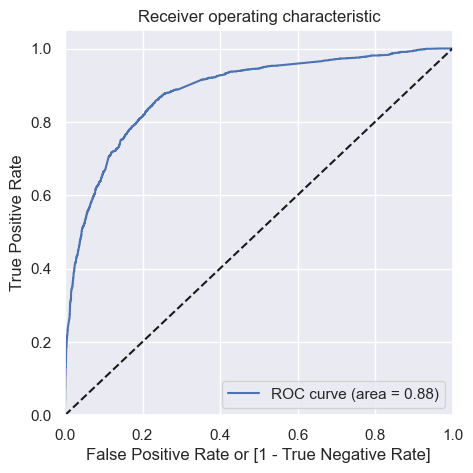

In [184]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [185]:
# We see we have rea under curve 88%, which is significant.
# lets find out the optiml cutoff point to strike a balance between, accuracy, sensitivity and specificity

#### Finding Optimal Cutoff Point

In [186]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.437518,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.077988,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.224904,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.835014,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.109526,3934,0,1,1,0,0,0,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.552412  0.972019  0.293853
0.2   0.2  0.782158  0.886456  0.717891
0.3   0.3  0.801948  0.848337  0.773363
0.4   0.4  0.812925  0.775750  0.835832
0.5   0.5  0.810297  0.664639  0.900050
0.6   0.6  0.800866  0.596513  0.926787
0.7   0.7  0.788806  0.529197  0.948776
0.8   0.8  0.764842  0.430657  0.970765
0.9   0.9  0.717687  0.279805  0.987506


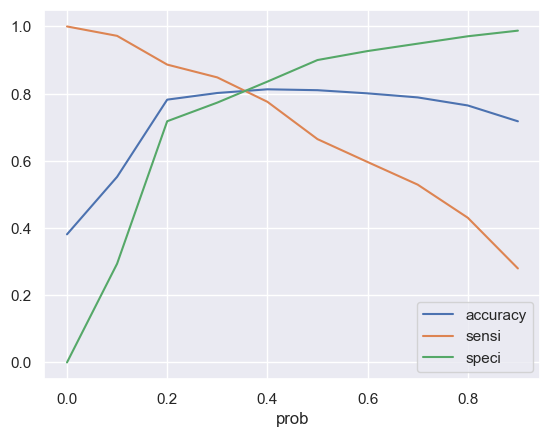

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### It seems the optimal cut-off point is around 0.35 

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.437518,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.077988,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.224904,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.835014,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.109526,3934,0,1,1,0,0,0,0,0,0,0,0,0


#### Assigning Lead Score

In [191]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.437518,1871,0,1,1,1,1,1,0,0,0,0,0,1,44
1,0,0.077988,6795,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.224904,3516,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.835014,8105,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.109526,3934,0,1,1,0,0,0,0,0,0,0,0,0,11


#### Checking relevant metrics with cut-off point as 0.35

In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.806895485466914

In [193]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3216,  786],
       [ 463, 2003]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8122465531224655

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.8035982008995503

In [197]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.19640179910044978


In [198]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7181785586231624


In [199]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8741505843979342


In [200]:
# we see although the accuracy dropped marginally, we have succesfullt achieved balanced sensitivity and specificity of around 81%

### Precision and Recall

#### Using sklearn utilities for calculating Precision and Recall

In [201]:
from sklearn.metrics import precision_score, recall_score

In [202]:
# precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.803825404610103

In [203]:
# recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6646390916463909

In [204]:
# Precision and recall both are concerned with positive predictions (positive means 'converted')
# Precision is basiclly positive predictive power of our model.
# Recall is sensitivity which measures how many predicted positives are actually positive.

#### Precision and recall tradeoff

In [205]:
from sklearn.metrics import precision_recall_curve

In [206]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [207]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

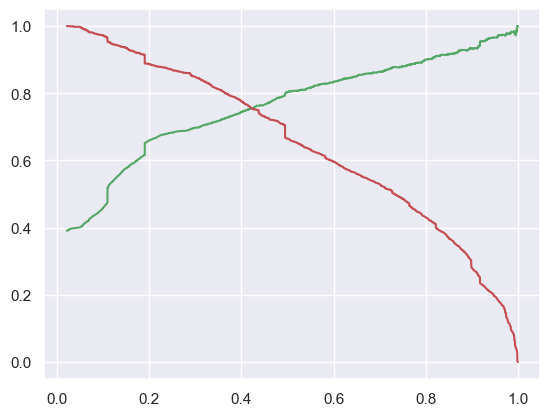

In [208]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Optimal cut-off point for Precision-recall tradeoff is around 0.42

#### Checking The precision and Recall Score Again

In [209]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.437518,1871,0,1,1,1,1,1,0,0,0,0,0,1,44
1,0,0.077988,6795,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.224904,3516,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.835014,8105,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.109526,3934,0,1,1,0,0,0,0,0,0,0,0,0,11


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.813543599257885

In [211]:
# precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7544426494345718

In [212]:
# recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7575020275750203

### Predictions 

####  Making predictions on the test set

In [213]:
X_test_lr = X_test[col_7]
X_test_lr.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_SMS Sent
4269,0,0.444982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2376,0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7766,0,0.025968,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9199,0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4359,0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
X_test_sm = sm.add_constant(X_test_lr)

In [215]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.749598
2376    0.917162
7766    0.944686
9199    0.109526
4359    0.897993
9186    0.598308
1631    0.441999
8963    0.141942
8007    0.099246
5324    0.378436
dtype: float64

In [216]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [217]:
# Let's see the head
y_pred_1.head()

,0
4269,0.749598
2376,0.917162
7766,0.944686
9199,0.109526
4359,0.897993


In [218]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [219]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [220]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [221]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [222]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.749598
1,1,2376,0.917162
2,1,7766,0.944686
3,0,9199,0.109526
4,1,4359,0.897993


In [223]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [224]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [225]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.749598
1,2376,1,0.917162
2,7766,1,0.944686
3,9199,0,0.109526
4,4359,1,0.897993


#### Assigning lead score to test data

In [226]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.749598,75
1,2376,1,0.917162,92
2,7766,1,0.944686,94
3,9199,0,0.109526,11
4,4359,1,0.897993,90


### Using Precision-Recall cutoff value of 0.42 as thresold probability

In [227]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [228]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,4269,1,0.749598,75,1
1,2376,1,0.917162,92,1
2,7766,1,0.944686,94,1
3,9199,0,0.109526,11,0
4,4359,1,0.897993,90,1


#### Test data evaluation 

In [229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8156565656565656

In [230]:
# Precision 
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7734082397003745

In [231]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.754337899543379

#### Using precision recall tradeoff we see, the model accuracy remains almost the same at 81% as train data.

#### The precision score and recall score comes out to be 77% and 75% respectively.

### Using Sensitivity-Specificity cutoff value of 0.35 as thresold probability

In [232]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,4269,1,0.749598,75,1
1,2376,1,0.917162,92,1
2,7766,1,0.944686,94,1
3,9199,0,0.109526,11,0
4,4359,1,0.897993,90,1


In [233]:
y_pred_final.drop('final_predicted' , axis =1 , inplace = True)

In [234]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.749598,75
1,2376,1,0.917162,92
2,7766,1,0.944686,94
3,9199,0,0.109526,11
4,4359,1,0.897993,90


In [235]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

#### Test data evaluation 

In [236]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1370,  307],
       [ 203,  892]], dtype=int64)

In [237]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816017316017316

In [238]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [239]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8146118721461187

In [240]:
# Let us calculate specificity
TN / float(TN+FP)

0.8169350029815146

In [241]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1830649970184854


In [242]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8709472345835982


In [243]:
# Positive predictive value 
print (TP / float(TP+FP))

0.74395329441201


#### Using sensitivity specificity we see, the model accuracy remains almost the same at 81% as train data.

#### The sensitivity and specificity comes out to be 81% both.

# CONCLUSIONS

####  As the problem is regarding increasing lead conversion rate , we are more concerned with identifying potential hot leads and their chances to conversion. The precision and recall score will be appropriate metric to evaluate model performance. we have used the cut off value as 0.42 which tries to strike balance between precision and recall.

#### As seen earlier, using this appraoch we have got both the score above 75% which is around the ballpark of 80% as required by CEO of X Education. 